Name : Hitesh Sanjaysing Girase

Branch/Year : BE AI&DS ( SEM - 7TH )

Roll No : 05

DMV Practical No & Title : 2. Analyzing Weather Data from OpenWeatherMap API

In [12]:
# Import Required Libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set(style="whitegrid")
print(" Libraries imported successfully.")


 Libraries imported successfully.


In [14]:
# Set API and Location Details

In [16]:
api_key = "fb365aa6104829b44455572365ff3b4e"


In [18]:
# Example: Coordinates for Pune region
lat = 18.184135
lon = 74.610764

In [20]:
# Construct API URL for 5-day / 3-hour forecast
url = f"https://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}&units=metric"

In [22]:
print(" API URL generated successfully:")
print(url)

 API URL generated successfully:
https://api.openweathermap.org/data/2.5/forecast?lat=18.184135&lon=74.610764&appid=fb365aa6104829b44455572365ff3b4e&units=metric


In [24]:
# Fetch Real-Time Weather Data

In [26]:
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print(" Weather data successfully retrieved from OpenWeatherMap API.")
else:
    print(" Failed to fetch data. Please check your API key or internet connection.")


 Weather data successfully retrieved from OpenWeatherMap API.


In [28]:
# Preprocess and Organize Data

In [30]:
# Extract useful data points
weather_records = []

for entry in data['list']:
    timestamp = datetime.datetime.fromtimestamp(entry['dt'])
    temp = entry['main']['temp']
    humidity = entry['main']['humidity']
    pressure = entry['main']['pressure']
    wind_speed = entry['wind']['speed']
    weather_desc = entry['weather'][0]['description']
    
    weather_records.append([timestamp, temp, humidity, pressure, wind_speed, weather_desc])

# Convert to DataFrame
weather_df = pd.DataFrame(weather_records, columns=[
    "DateTime", "Temperature (°C)", "Humidity (%)", "Pressure (hPa)", "Wind Speed (m/s)", "Description"
])

print(" Data successfully organized into DataFrame.")
display(weather_df.head())


 Data successfully organized into DataFrame.


,DateTime,Temperature (°C),Humidity (%),Pressure (hPa),Wind Speed (m/s),Description
0,2025-10-28 20:30:00,23.81,74,1009,2.96,light rain
1,2025-10-28 23:30:00,23.58,75,1009,3.43,light rain
2,2025-10-29 02:30:00,23.07,78,1008,2.79,overcast clouds
3,2025-10-29 05:30:00,22.51,80,1007,2.18,overcast clouds
4,2025-10-29 08:30:00,23.10,79,1009,1.77,overcast clouds


In [32]:
# Basic Data Checks

In [34]:
print(" Dataset Information:")
print(weather_df.info())


 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DateTime          40 non-null     datetime64[ns]
 1   Temperature (°C)  40 non-null     float64       
 2   Humidity (%)      40 non-null     int64         
 3   Pressure (hPa)    40 non-null     int64         
 4   Wind Speed (m/s)  40 non-null     float64       
 5   Description       40 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.0+ KB
None


In [36]:
print("\n Missing Values Check:")
print(weather_df.isnull().sum())



 Missing Values Check:
DateTime            0
Temperature (°C)    0
Humidity (%)        0
Pressure (hPa)      0
Wind Speed (m/s)    0
Description         0
dtype: int64


In [38]:
print("\n Summary Statistics:")
display(weather_df.describe())


 Summary Statistics:


,DateTime,Temperature (°C),Humidity (%),Pressure (hPa),Wind Speed (m/s)
count,40,40.000000,40.000000,40.00000,40.000000
mean,2025-10-31 07:00:00,23.971750,70.425000,1009.80000,3.473250
min,2025-10-28 20:30:00,18.980000,41.000000,1006.00000,0.300000
25%,2025-10-30 01:45:00,22.397500,62.500000,1008.00000,2.140000
50%,2025-10-31 07:00:00,23.560000,74.000000,1009.50000,3.070000
75%,2025-11-01 12:15:00,25.857500,80.000000,1012.00000,4.525000
max,2025-11-02 17:30:00,29.290000,88.000000,1013.00000,8.060000
std,NaN,2.690171,12.171609,2.15073,1.939685


In [40]:
print("\n dataset overview (First few rows):")
display(weather_df.head())
print("\n dataset overview (lasr few rows):")
display(weather_df.tail())


 dataset overview (First few rows):


,DateTime,Temperature (°C),Humidity (%),Pressure (hPa),Wind Speed (m/s),Description
0,2025-10-28 20:30:00,23.81,74,1009,2.96,light rain
1,2025-10-28 23:30:00,23.58,75,1009,3.43,light rain
2,2025-10-29 02:30:00,23.07,78,1008,2.79,overcast clouds
3,2025-10-29 05:30:00,22.51,80,1007,2.18,overcast clouds
4,2025-10-29 08:30:00,23.10,79,1009,1.77,overcast clouds



 dataset overview (lasr few rows):


,DateTime,Temperature (°C),Humidity (%),Pressure (hPa),Wind Speed (m/s),Description
35,2025-11-02 05:30:00,21.50,84,1011,2.44,broken clouds
36,2025-11-02 08:30:00,23.43,74,1013,1.61,overcast clouds
37,2025-11-02 11:30:00,27.25,59,1012,0.95,broken clouds
38,2025-11-02 14:30:00,29.09,52,1008,2.71,light rain
39,2025-11-02 17:30:00,27.14,63,1009,3.14,light rain


In [44]:
print("\n dataset shape:")
display(weather_df.shape)


 dataset shape:


(40, 6)

In [46]:
# Analyze Key Weather Parameters

In [48]:
# Calculate averages
avg_temp = weather_df["Temperature (°C)"].mean()
avg_humidity = weather_df["Humidity (%)"].mean()
avg_wind = weather_df["Wind Speed (m/s)"].mean()

In [50]:
print(f" Average Temperature: {avg_temp:.2f} °C")
print(f" Average Humidity: {avg_humidity:.2f} %")
print(f" Average Wind Speed: {avg_wind:.2f} m/s")

 Average Temperature: 23.97 °C
 Average Humidity: 70.42 %
 Average Wind Speed: 3.47 m/s


In [52]:
# Most common weather condition
common_weather = weather_df["Description"].mode()[0]
print(f" Most Common Weather: {common_weather.capitalize()}")

 Most Common Weather: Overcast clouds


In [54]:
# Visualize Temperature Trend

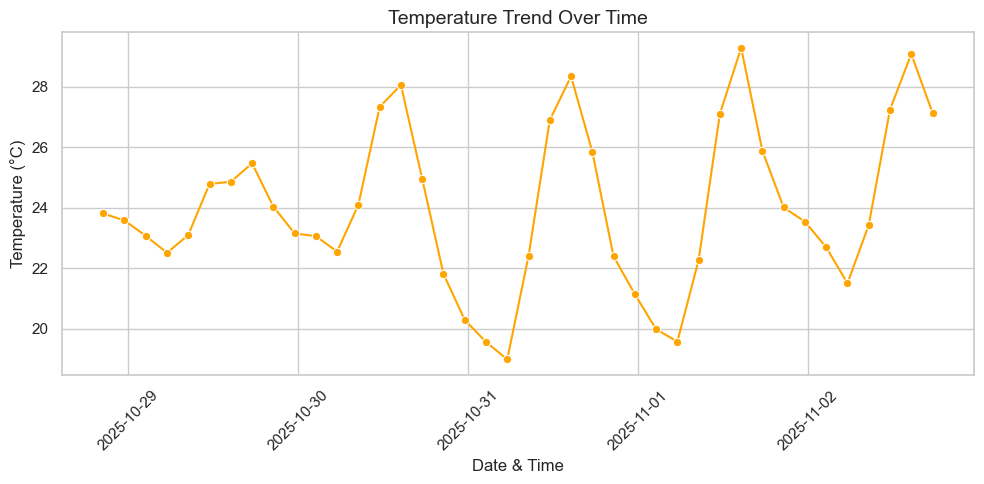

In [56]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="DateTime", y="Temperature (°C)", data=weather_df, marker='o', color='orange')
plt.title("Temperature Trend Over Time", fontsize=14)
plt.xlabel("Date & Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [58]:
# Visualize Humidity Trend

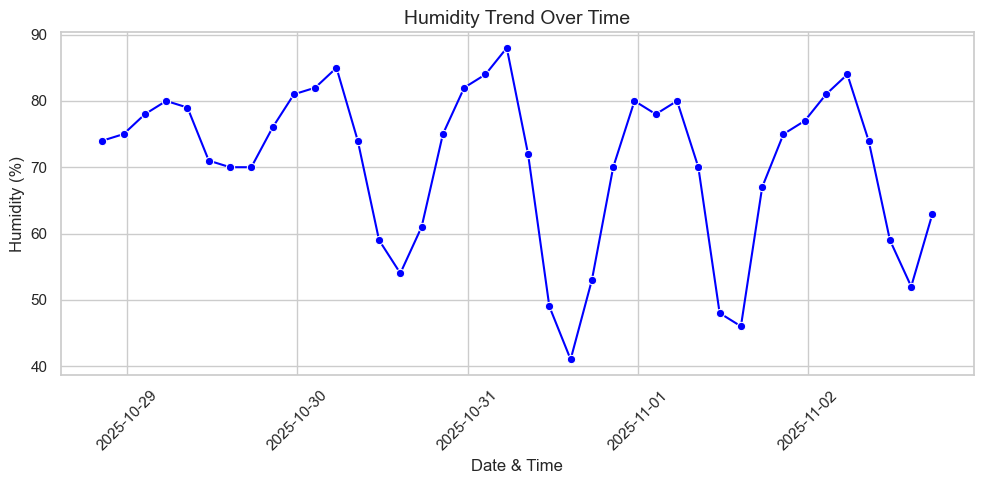

In [60]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="DateTime", y="Humidity (%)", data=weather_df, marker='o', color='blue')
plt.title("Humidity Trend Over Time", fontsize=14)
plt.xlabel("Date & Time")
plt.ylabel("Humidity (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
# Wind Speed Distribution

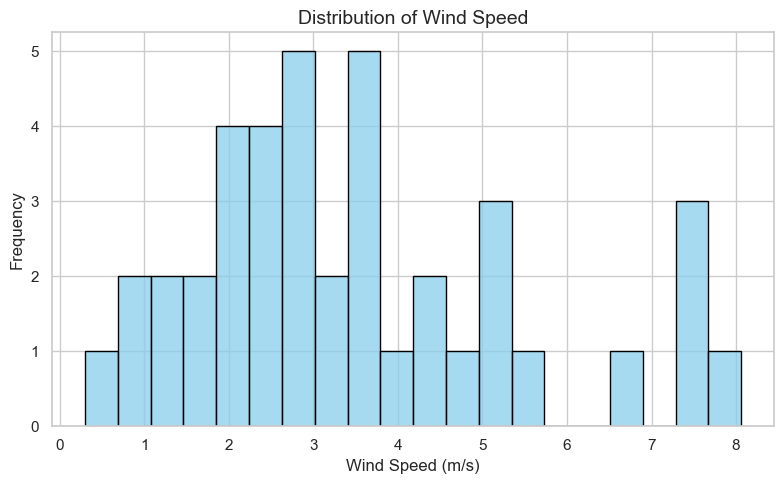

In [64]:
plt.figure(figsize=(8, 5))
sns.histplot(weather_df["Wind Speed (m/s)"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Wind Speed", fontsize=14)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [66]:
# Correlation Between Parameters

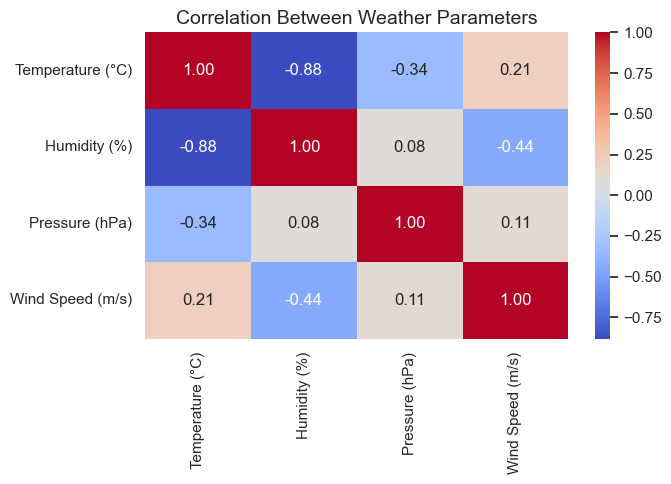

In [68]:
plt.figure(figsize=(7, 5))
sns.heatmap(weather_df[["Temperature (°C)", "Humidity (%)", "Pressure (hPa)", "Wind Speed (m/s)"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Weather Parameters", fontsize=14)
plt.tight_layout()
plt.show()


In [70]:
# Weather Condition Frequency

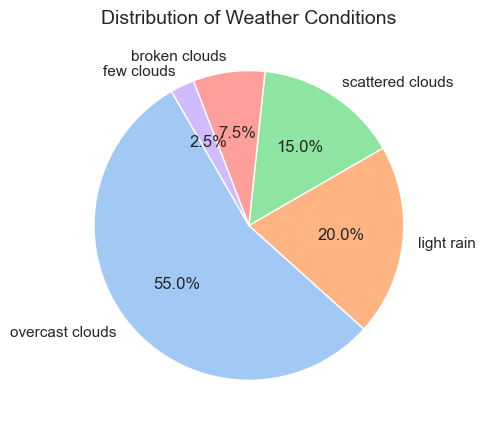

In [74]:
plt.figure(figsize=(5, 5))
condition_counts = weather_df["Description"].value_counts()
plt.pie(
    condition_counts,
    labels=condition_counts.index,
    autopct='%1.1f%%',
    startangle=120,
    colors=sns.color_palette("pastel")
)
plt.title("Distribution of Weather Conditions", fontsize=14)
plt.tight_layout()
plt.show()


In [76]:
# Minimum & Maximum Temperatures

In [78]:
# Find min and max temperatures
min_temp = weather_df["Temperature (°C)"].min()
max_temp = weather_df["Temperature (°C)"].max()

In [80]:
# Get the corresponding timestamps
min_temp_time = weather_df.loc[weather_df["Temperature (°C)"].idxmin(), "DateTime"]
max_temp_time = weather_df.loc[weather_df["Temperature (°C)"].idxmax(), "DateTime"]

In [86]:
print(" Temperature Analysis : ")
print(f"Minimum Temperature: {min_temp:.2f} °C at {min_temp_time}")
print(f"Maximum Temperature: {max_temp:.2f} °C at {max_temp_time}")

 Temperature Analysis : 
Minimum Temperature: 18.98 °C at 2025-10-31 05:30:00
Maximum Temperature: 29.29 °C at 2025-11-01 14:30:00


Conclusion & key findings:

1) Successfully retrieved real-time weather data using the OpenWeatherMap API.

2) Preprocessed and structured the data into a clean, analyzable format using Pandas.

3) Identified temperature, humidity, and wind speed trends, including min and max temperature values.

4) Created visualizations (line and bar charts) to show weather patterns clearly.

5) Overall, achieved all objectives — enabling data-driven insights useful for weather-based decision-making.